In [10]:
# let's plot some data and get more familiar with the library matplotlib
# and pandas for pre processing data and plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# In the previous script I created couple f dataset for all the matches n the italian championship
# those data have been then stored in two CSV file that we can now read and use
df_shots = pd.read_csv('shots_df.csv')
df_roasters = pd.read_csv('roasters_df.csv')
print(df_shots.head())
print(df_roasters.head())
# ok this was easy

   Unnamed: 0  match_id  season_year championship_name     id  goals  \
0           0      5149         2014           Serie_A  46551      0   
1           1      5149         2014           Serie_A  46552      0   
2           2      5149         2014           Serie_A  46553      0   
3           3      5149         2014           Serie_A  46554      0   
4           4      5149         2014           Serie_A  46555      0   

   own_goals  shots   xG  time  ...  yellow_card  red_card roster_in  \
0          0      0  0.0    90  ...            0         0         0   
1          0      0  0.0    90  ...            0         0         0   
2          0      0  0.0    90  ...            1         0         0   
3          0      0  0.0    90  ...            0         0         0   
4          1      0  0.0    90  ...            0         0         0   

  roster_out key_passes  assists        xA   xGChain  xGBuildup  positionOrder  
0          0          0        0  0.000000  0.000000 

In [22]:
# So what do we want to plot initially? 
# Let's think about the relationship between the disciplinary measures and the fact that a team
# plays in home or away
# Extract only the data in the roasters_df that are related to a penalty situation
penalties = df_roasters[df_roasters.situation=='Penalty']
print(penalties)

       Unnamed: 0      id championship_name  minute     result      X    Y  \
83             83   41503           Serie_A      63       Goal  0.885  0.5   
105           105   41519           Serie_A      93  SavedShot  0.885  0.5   
195           195   41593           Serie_A      19  SavedShot  0.885  0.5   
349           349   41854           Serie_A      26  SavedShot  0.885  0.5   
424           424   41667           Serie_A      84       Goal  0.885  0.5   
...           ...     ...               ...     ...        ...    ...  ...   
57430       57430  347604           Serie_A      48       Goal  0.885  0.5   
57466       57466  348011           Serie_A      68       Goal  0.885  0.5   
57502       57502  348216           Serie_A      84       Goal  0.885  0.5   
57525       57525  348293           Serie_A      89       Goal  0.885  0.5   
57675       57675  349867           Serie_A      88  SavedShot  0.885  0.5   

             xG             player h_a  ...  season   shotType 

In [35]:
# Let's plot this data, in a perfect world, what I would expect is that, due to the fact that we are
# running this analysis on a huge amount of data, and the events of a penalty should be randomic
# and independent as a coin toss, the number of penalties given to the home team should be the same 
# to the ones given to the away team.
# Let's see what the data tells us, if there are some strange relationship
# filter only useful columns to be plotted
penalties = penalties[['h_a','season']]
#print(penalties.values.tolist())
print('AWAY')
away_plt = penalties[penalties.h_a=='a'].groupby(['season'], as_index=False).count()
print(away_plt)
print('\nHOME')
home_plt = penalties[penalties.h_a=='h'].groupby(['season'], as_index=False).count()
print(home_plt)

AWAY
   season  h_a
0    2014   49
1    2015   52
2    2016   53
3    2017   60
4    2018   43
5    2019   61

HOME
   season  h_a
0    2014   69
1    2015   69
2    2016   84
3    2017   66
4    2018   79
5    2019   56


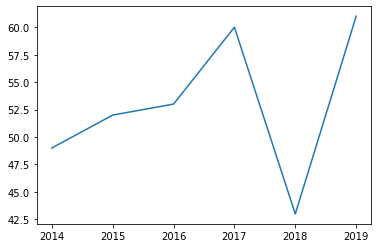

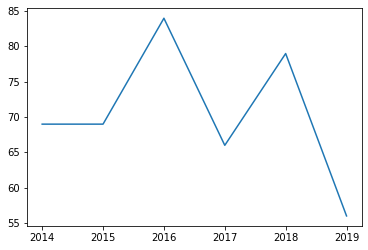

In [37]:
# interesting, after 5 seasons , the 2019 is the first year in which the number of penalties given to 
# the away team has overcomed the one gives to the home team
plt.plot(away_plt[['season']], away_plt[['h_a']])
plt.show()
plt.plot(home_plt[['season']], home_plt[['h_a']])
plt.show()